# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('demo01.csv')
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [6]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [7]:
data.drop_duplicates()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [8]:
data.shape

(16650, 16)

In [9]:
data = data.drop_duplicates()
data.shape

(6770, 16)

In [10]:
data.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16649,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [11]:
data.reset_index(drop=True, inplace=True)
data.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
6769,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [12]:
#Identificando e tratando dados ausentes 

data.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [14]:
# Criar um novo dataframe com os nomes das variáveis e seus tipos de dados
data_variaveis = pd.DataFrame({
    'variavel': data.columns,
    'tipo_dado': data.dtypes.values
})

# Exibir o dataframe
print(data_variaveis)



                 variavel tipo_dado
0                    sexo    object
1        posse_de_veiculo    object
2         posse_de_imovel    object
3              qtd_filhos     int64
4              tipo_renda    object
5                educacao    object
6            estado_civil    object
7         tipo_residencia    object
8                   idade   float64
9           tempo_emprego   float64
10         possui_celular     int64
11  possui_fone_comercial     int64
12            possui_fone     int64
13           possui_email     int64
14  qt_pessoas_residencia   float64
15                    mau      bool


In [15]:
# Inicializar uma lista vazia
qtd_categorias = []

# 2. Iterar pelos nomes das variáveis
for col in data.columns:
    
    # 3. Contar o número de categorias únicas na variável
    num_categorias = data[col].nunique()
    
    # 4. Acumular a informação na lista
    qtd_categorias.append(num_categorias)

# 5. Adicionar a lista como uma nova coluna no dataframe de variáveis
data_variaveis['qtd_categorias'] = qtd_categorias

# Exibir o dataframe atualizado
print(data_variaveis)

                 variavel tipo_dado  qtd_categorias
0                    sexo    object               2
1        posse_de_veiculo    object               2
2         posse_de_imovel    object               2
3              qtd_filhos     int64               8
4              tipo_renda    object               5
5                educacao    object               5
6            estado_civil    object               5
7         tipo_residencia    object               6
8                   idade   float64            5298
9           tempo_emprego   float64            3005
10         possui_celular     int64               1
11  possui_fone_comercial     int64               2
12            possui_fone     int64               2
13           possui_email     int64               2
14  qt_pessoas_residencia   float64               9
15                    mau      bool               2


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [17]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [18]:
data['sexo'].unique()

array(['M', 'F'], dtype=object)

In [19]:
data['posse_de_veiculo'].unique()

array(['Y', 'N'], dtype=object)

In [20]:
data['posse_de_imovel'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
data['qtd_filhos'].unique()

array([ 0,  1,  3,  2,  4,  5, 14,  7], dtype=int64)

In [22]:
data['tipo_renda'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [23]:
data['educacao'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [24]:
data['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [25]:
data['tipo_residencia'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [26]:
data['idade'].unique()

array([58.83287671, 52.35616438, 46.22465753, ..., 54.93972603,
       35.83561644, 43.3890411 ])

In [27]:
data['tempo_emprego'].unique()

array([ 3.10684932,  8.35890411,  2.10684932, ..., 22.35890411,
        1.66027397, 30.88219178])

In [28]:
data['possui_celular'].unique()

array([1], dtype=int64)

In [29]:
data['possui_fone_comercial'].unique()

array([0, 1], dtype=int64)

In [30]:
data['possui_fone'].unique()

array([0, 1], dtype=int64)

In [31]:
data['possui_email'].unique()

array([0, 1], dtype=int64)

In [32]:
data['qt_pessoas_residencia'].unique()

array([ 2.,  1.,  5.,  3.,  4.,  6., 15.,  9.,  7.])

In [33]:
data['mau'].unique()

array([False,  True])

In [34]:
# data_encoded = data.copy()

data_encoded = pd.get_dummies(data, columns=['tipo_renda','educacao', 'estado_civil', 'tipo_residencia', 'sexo', 'posse_de_veiculo', 'posse_de_imovel'], drop_first=True)
data_encoded.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_renda_Pensioner,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,False,False,True,False,False,False,False,True,True,True
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,True,False,False,False,False,False,False,True
2,0,46.224658,2.106849,1,1,1,1,2.0,False,False,...,False,False,True,False,False,False,False,True,True,True
3,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [35]:
data_encoded.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool
estado_civil_Separated                       bool
estado_civil_Single / not married            bool


In [36]:
# Converter todas as colunas booleanas para inteiros no dataframe codificado
data_encoded = data_encoded.astype(int)
data_encoded.dtypes

qtd_filhos                                int32
idade                                     int32
tempo_emprego                             int32
possui_celular                            int32
possui_fone_comercial                     int32
possui_fone                               int32
possui_email                              int32
qt_pessoas_residencia                     int32
mau                                       int32
tipo_renda_Pensioner                      int32
tipo_renda_State servant                  int32
tipo_renda_Student                        int32
tipo_renda_Working                        int32
educacao_Higher education                 int32
educacao_Incomplete higher                int32
educacao_Lower secondary                  int32
educacao_Secondary / secondary special    int32
estado_civil_Married                      int32
estado_civil_Separated                    int32
estado_civil_Single / not married         int32
estado_civil_Widow                      

In [37]:
data_encoded.head(20)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_renda_Pensioner,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,1,1,1
1,0,52,8,1,0,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,46,2,1,1,1,1,2,0,0,...,0,0,1,0,0,0,0,1,1,1
3,0,29,3,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,27,4,1,0,1,0,2,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1,30,4,1,0,0,0,2,0,0,...,1,0,1,0,0,0,0,0,0,1
6,3,34,3,1,0,0,0,5,0,0,...,0,0,1,0,0,0,0,1,1,1
7,1,32,5,1,0,0,0,3,0,0,...,0,0,1,0,0,0,0,1,0,1
8,0,56,12,1,0,1,0,2,0,0,...,0,0,1,0,0,0,0,1,1,1
9,2,43,8,1,0,0,0,4,0,0,...,0,0,1,0,0,0,0,0,1,1


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [39]:
freq = pd.crosstab(data_encoded['possui_email'], data_encoded['mau'])
freq

mau,0,1
possui_email,,
0,5927,278
1,545,20


In [40]:
freq.sum(axis=1)

possui_email
0    6205
1     565
dtype: int64

In [41]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

mau,0,1
possui_email,,
0,0.955197,0.044803
1,0.964602,0.035398


In [42]:
freq_pctlin.sum(axis = 1)

possui_email
0    1.0
1    1.0
dtype: float64

<Axes: xlabel='possui_email'>

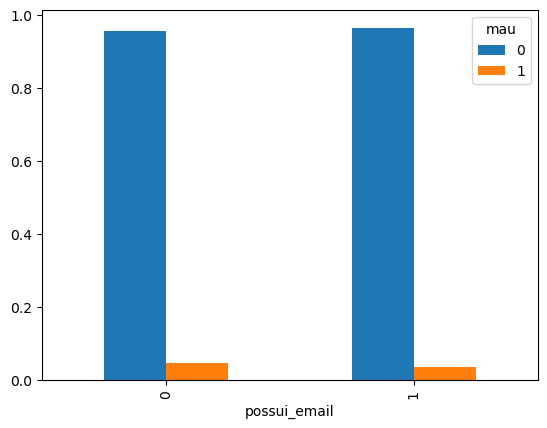

In [43]:
freq_pctlin.plot.bar()

In [44]:
freq = pd.crosstab(data_encoded['posse_de_veiculo_Y'], data_encoded['mau'])
freq

mau,0,1
posse_de_veiculo_Y,,
0,4021,190
1,2451,108


In [45]:
freq.sum(axis=1)

posse_de_veiculo_Y
0    4211
1    2559
dtype: int64

In [46]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

mau,0,1
posse_de_veiculo_Y,,
0,0.954880,0.045120
1,0.957796,0.042204


In [47]:
freq_pctlin.sum(axis = 1)

posse_de_veiculo_Y
0    1.0
1    1.0
dtype: float64

<Axes: xlabel='posse_de_veiculo_Y'>

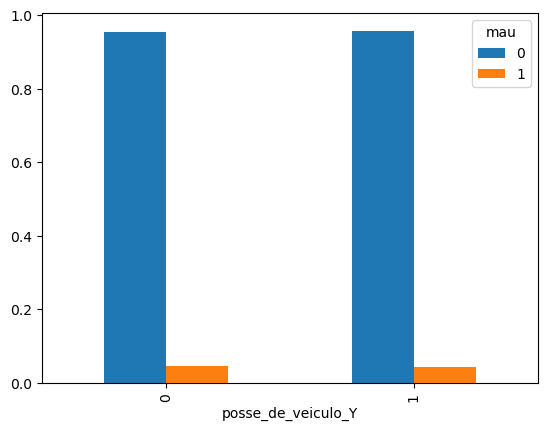

In [48]:
freq_pctlin.plot.bar()

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [53]:
data_encoded.to_csv('demo_tratado.csv', index=False)